In [61]:
import pandas as pd
import numpy as np
from sklearn import neighbors
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
df = pd.read_csv('clothes.csv')
df.head()

,weight,age,height,size
0,62,28.0,172.72,XL
1,59,36.0,167.64,L
2,61,34.0,165.10,M
3,65,27.0,175.26,L
4,62,45.0,172.72,M


In [63]:
df.shape

(119734, 4)

In [64]:
df.dropna(inplace=True)

In [65]:
df.drop(df.loc[df['size'] == 'XXL'].index,inplace = True)

c:\Users\oktay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


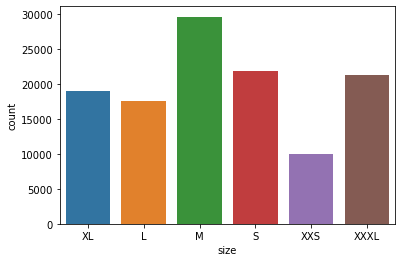

In [66]:
sns.countplot(df['size'])
plt.show()

In [67]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['size'] = le.fit_transform(df['size'])

le.classes_

array(['L', 'M', 'S', 'XL', 'XXS', 'XXXL'], dtype=object)

In [68]:
X = df[['weight','height']]
y = df['size']

In [69]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [70]:
accuracy_score_list = list()

for k in range(20):
    k += 1
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    pred = knn.predict(x_test)
    accuracy = accuracy_score(y_test,pred)
    accuracy_score_list.append(accuracy)
    print('K=',k,accuracy)


K= 1 0.36838716900856516
K= 2 0.3714661590998153
K= 3 0.4019201701841796
K= 4 0.41406818563511166
K= 5 0.43142249342215755
K= 6 0.43279404355371437
K= 7 0.4480210490958966
K= 8 0.4512120024631921
K= 9 0.4452779488327828
K= 10 0.4494205900464648
K= 11 0.45697811117953313
K= 12 0.4608968258411241
K= 13 0.4668588702905447
K= 14 0.4696019705536584
K= 15 0.4661590998152606
K= 16 0.4735766668532721
K= 17 0.4734367127582153
K= 18 0.4742204556905335
K= 19 0.47276493310194256
K= 20 0.47567597827912445


In [71]:
accuracy_score_list = pd.DataFrame(accuracy_score_list)
accuracy_score_list.index = accuracy_score_list.index + 1

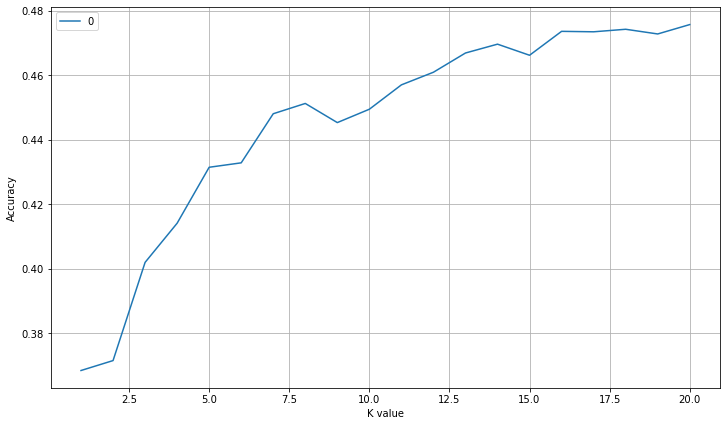

In [72]:
graf = pd.DataFrame(accuracy_score_list)
graf.plot(figsize=(12,7))
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [74]:
from sklearn.neighbors import KNeighborsClassifier

n_neighbors = 20
knn = KNeighborsClassifier(n_neighbors).fit(x_train,y_train)
knn.predict(x_train)
y_pred = knn.predict(x_test)

In [75]:
#Hata Matrisi

c:\Users\oktay\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


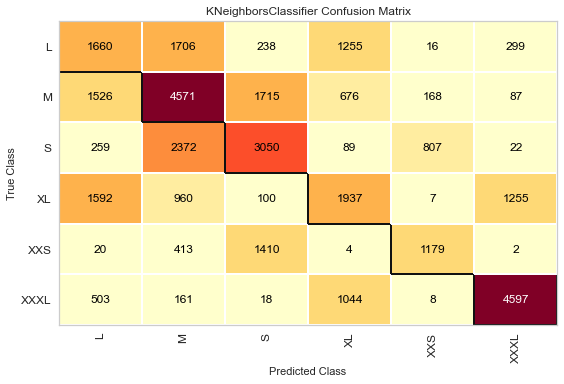

<AxesSubplot:title={'center':'KNeighborsClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [76]:
from yellowbrick.classifier import ConfusionMatrix

kategori = ['L', 'M', 'S', 'XL', 'XXS', 'XXXL']
cm = ConfusionMatrix(knn)
cm = ConfusionMatrix(knn,classes=kategori)
cm.fit(x_train,y_train)
cm.score(x_test,y_test)
cm.poof()

In [77]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.47567597827912445